In [3]:
import numpy as np
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import AltAz

ra_input = float(input("Ra"))
dec_input = float(input("Dec",))
afov = float(input("Apparent FOV in degrees"))*0.017453304004166
f_objective = float(input("Focal length of Objective",))
f_eyepiece = float(input("Focal length of Eyepiece",))
d_telescope = float(input("Diameter in mm",))

fov = afov/(f_objective/f_eyepiece)
data = np.loadtxt("hygdata_v3.csv",delimiter=",",usecols = (23,24,16,33,9,13,6),dtype=np.str)
ra = data[:,0]
dec = data[:,1]
color = data[:,2]
lum = data[:,3]
dist = data[:,4]
mag = data[:,5]
name = data[:,6]

#Some stars have their common name in the hipparcos data
name_ind_list = np.where(name!='')
name = name[name_ind_list]
name_x = ra[name_ind_list]
name_y = dec[name_ind_list]

m_limiting = float(3-2+2.5*np.log10(d_telescope*(f_objective/f_eyepiece)*0.9))

#Converting all strings to floats
ra = np.array([float(x) for x in ra])
dec = np.array([float(x) for x in dec])
color = np.array([float(x) if x!="" else 0 for x in color])
lum = np.array([float(x) for x in lum])
dist = np.array([float(x) for x in dist])
mag = np.array([float(x) for x in mag])
name_x = np.array([float(x) for x in name_x])
name_y = np.array([float(x) for x in name_y])

indices = np.where(mag<=m_limiting)

#converting ra values
ra = np.array([-(2*np.pi-x) if x>np.pi else x for x in ra])
name_x = np.array([-(2*np.pi-x) if x>np.pi else x for x in name_x])

ra_visible = ra[indices]
dec_visible = dec[indices]
color = color[indices]

#computing intensity for sake of marker sizes
intensity = lum/(dist**2)
norm_int = intensity/np.amax(intensity)
norm_int = norm_int[indices]

color = np.array([x if x<2 else 2 for x in color])#not being used
color = (color - np.amin(color))/(np.amax(color)-np.amin(color))
print(np.argmax(intensity))

#filter only ra and dec values within fov

#print (norm_int)

Ra 1.7677953696022
Dec -0.291751258517685
Apparent FOV in degrees 100
Focal length of Objective 90
Focal length of Eyepiece 1
Diameter in mm 300


32262


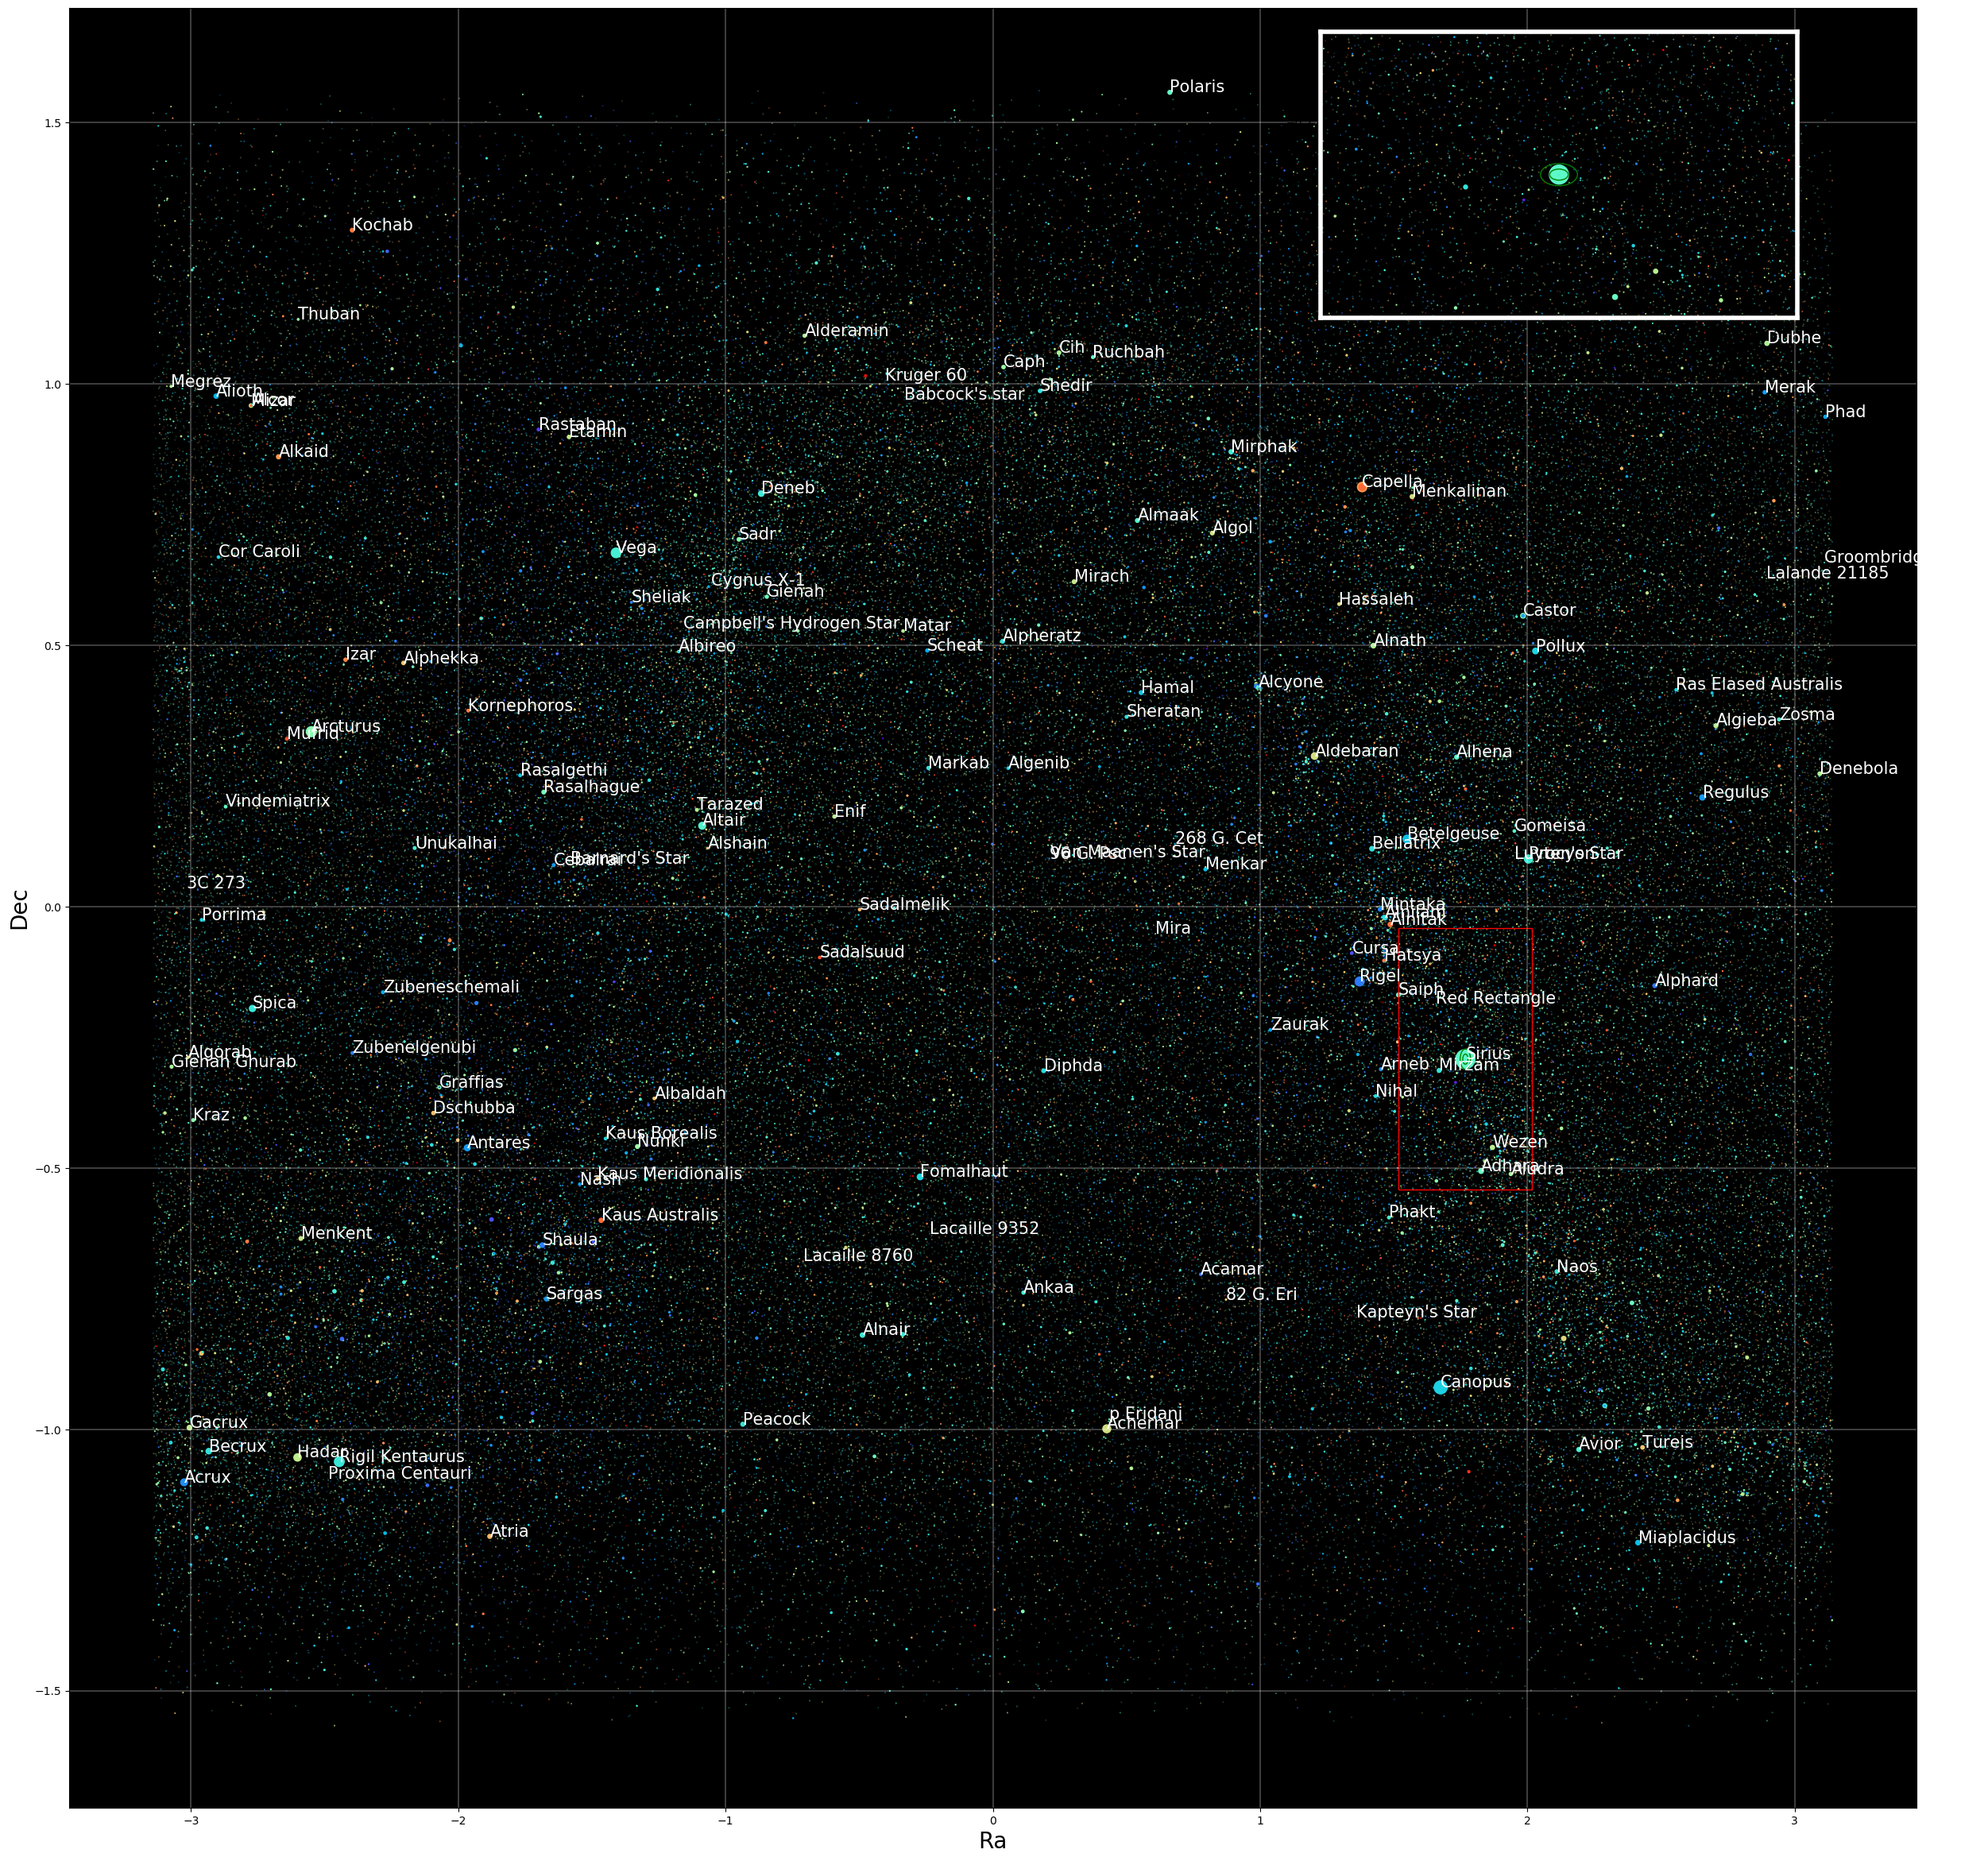

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(30,30),dpi=100,facecolor='white',constrained_layout=False)
ax = fig.add_subplot(111,facecolor = "k")

#To show only names of stars within fov
reduced_index = np.where(name_x<ra_input+0.25)
reduced_index = np.where(name_x[reduced_index]>ra_input-0.25)

for i,txt in enumerate(name):
    ax.annotate(txt, (name_x[i],name_y[i]),color="white",xycoords='data',size=15)

ax.scatter(ra_visible,dec_visible,s=norm_int*300,c=color[::-1],cmap="rainbow")
bx1 = patches.Rectangle(xy=(ra_input-0.25,dec_input-0.25),width=0.5,height=0.5,fill=False,edgecolor="red")
circle_in = plt.Circle((ra_input,dec_input),fov/2,color="green",fill=False,label="{}".format(fov/2))
circle_out = plt.Circle((ra_input,dec_input),fov,color="green",fill=False,label="{}".format(fov))
ax.add_artist(circle_in)
ax.add_artist(circle_out)
ax.add_patch(bx1)

ax.grid(True,linewidth=0.35,color='w')
#ax.set_xlim([ra_input-0.25,ra_input+0.25])
#ax.set_ylim([dec_input-0.25,dec_input+0.25])
ax.set_ylabel("Dec",size=20)
ax.set_xlabel("Ra",size=20)

#make a patch rectangle in which i can show the zoomed in plot
#bx2 = patches.Rectangle(xy=(1.5,1.2),width=1.6,height=0.5,fill=False,edgecolor="white")
#ax.add_patch(bx2)
#plt.savefig("ex",bbox_inches="tight",facecolor="gray")

#use add axes to show zoomed in thing
ax2 = fig.add_axes([0.65,0.75,0.2,0.12])
ax2.set_facecolor("black")
ax2.scatter(ra_visible,dec_visible,s=norm_int*300,c=color[::-1],cmap="rainbow")
circle_in = plt.Circle((ra_input,dec_input),fov/2,color="green",fill=False,label="{}".format(fov/2))
circle_out = plt.Circle((ra_input,dec_input),fov,color="green",fill=False,label="{}".format(fov))
ax2.add_artist(circle_in)
ax2.add_artist(circle_out)
ax2.set_xlim([ra_input-0.25,ra_input+0.25])
ax2.set_ylim([dec_input-0.25,dec_input+0.25])
for spine in ax2.spines.values():
    spine.set_edgecolor("white")
    spine.set_linewidth("4")
    
plt.savefig("ex")

NameError: name 'm' is not defined

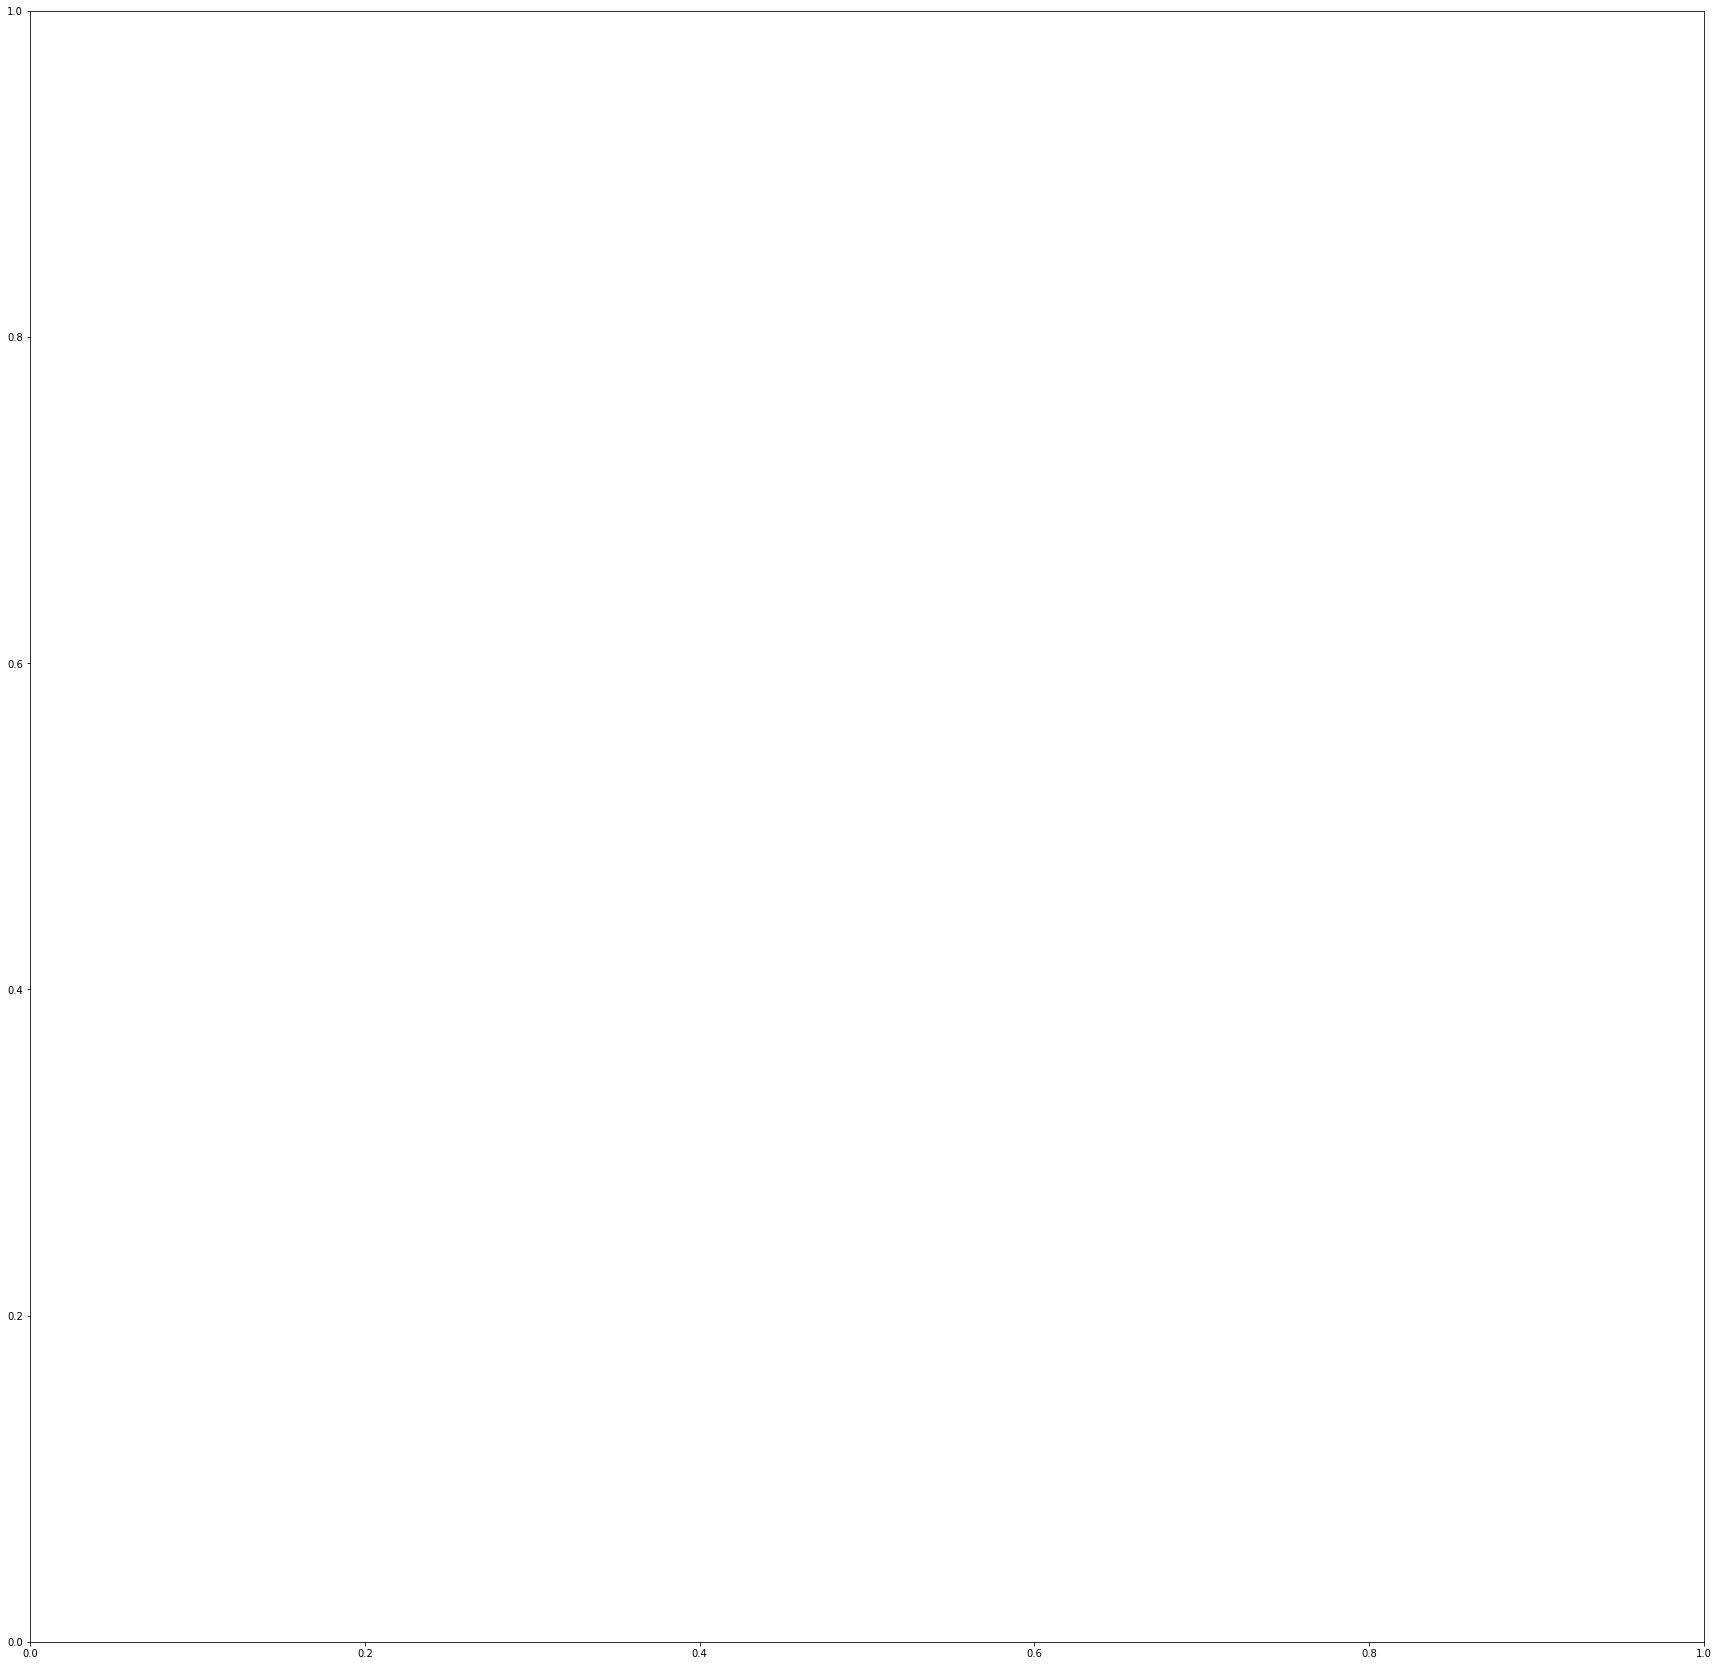

In [8]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(30,30))
ax= fig.add_subplot(111)
x1,y1 = m((ra_input-fov)*180/np.pi,(dec_input-fov)*180/np.pi)
x2,y2 = m((ra_input-fov)*180/np.pi,(dec_input+fov)*180/np.pi)
m = Basemap(projection = "moll",lon_0 = 0, resolution = "c")
m.drawmapboundary(fill_color="gray")
parallels = np.arange(-90,90,15)
meridians = np.arange(-180,180,15)
x,y = m(ra_visible*180/np.pi,dec_visible*180/np.pi)
m.drawparallels(parallels)
m.drawmeridians(meridians)
m.scatter(x,y,s=norm_int*500,marker='o',color='black')
ax.set_xlim([x1,x2])
ax.set_ylim([y1,y2])
plt.show()